In [78]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/netanelshalev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Loading data

In [3]:
def load_json(file_path):
    """Load a JSON file and return its content."""
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

data = load_json('Mike_Donovan.json')

## PLOTING ABSTRACT DICT

In [ ]:

def plot_dict(dictionary : dict, label_y: str):
    """plot key value items where the key is x axis."""

    keys = list(dictionary.keys())
    values = list(dictionary.values())

    plt.figure(figsize=(4, 4))
    plt.bar(keys, values, color='skyblue')
    
    # Add trend line
    z = np.polyfit(keys, values, 1)
    p = np.poly1d(z)
    plt.plot(keys, p(keys), "r--", alpha=0.8, linewidth=2, label='Trend')
    
    plt.xlabel('Age')
    plt.ylabel(f'Number of {label_y}')
    plt.title(f'Number of {label_y} in Retellings by Age')
    plt.xticks(keys)
    plt.legend()
    plt.show()

## NOUNS

In [29]:
def count_nouns_in_text(text):
    """Count the number of nouns in the given text."""
    blob = TextBlob(text)
    return len(blob.noun_phrases)

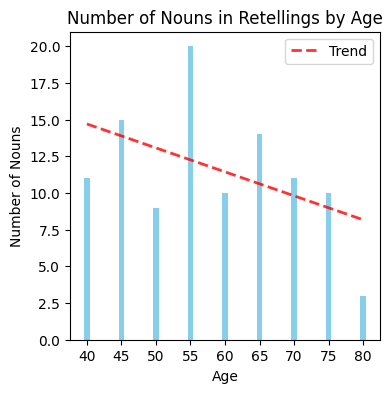

In [28]:

nouns_counts_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    noun_count = count_nouns_in_text(text)
    nouns_counts_by_age[age] = noun_count
    
plot_dict(nouns_counts_by_age, "Nouns")

### In my opinion, we need to determine where the disease was diagnosed.

## Word length:

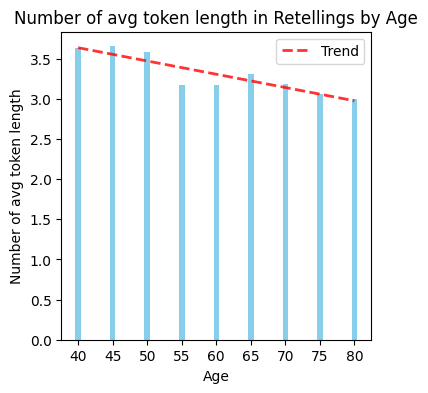

In [32]:
from nltk.tokenize import word_tokenize
def count_tokens_avg_length_in_text(text):
    """Count the number of tokens in the given text."""
    tokens = word_tokenize(text)
    return np.mean([len(token) for token in tokens])

token_avg_len_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    token_avg_len = count_tokens_avg_length_in_text(text)
    token_avg_len_by_age[age] = token_avg_len
    
plot_dict(token_avg_len_by_age, "avg token length")

## Word Frequency Index

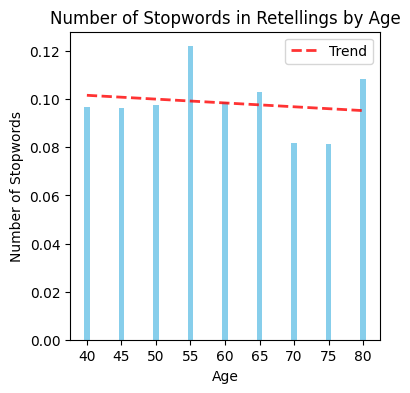

In [37]:

def count_stopwords_in_text(text):
    """Count the number of stopwords in the given text."""
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    return sum(1 for token in tokens if token.lower() in stop_words)

stopwords_percentage_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    stopword_count = count_stopwords_in_text(text)
    stopwords_percentage_by_age[age] = stopword_count / len(text)
    
    
plot_dict(stopwords_percentage_by_age, "Stopwords")

## hapax legomena - words used once

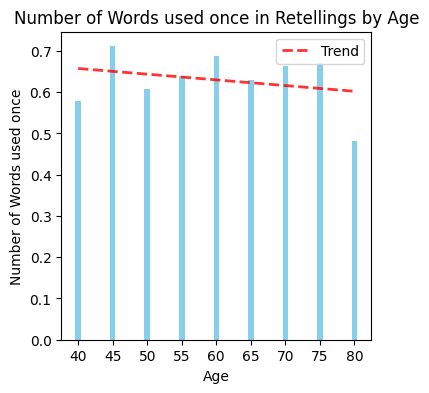

In [44]:
def word_used_once(text):
    """Count the number of words used only once in the text."""
    tokens = word_tokenize(text)
    word_freq = nltk.FreqDist(tokens)
    return sum(1 for _, count in word_freq.items() if count == 1)

words_used_once_freq_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    once_count = word_used_once(text)
    words_used_once_freq_by_age[age] = once_count / len(text.split())
    
plot_dict(words_used_once_freq_by_age, "Words used once")

## words used once or twice

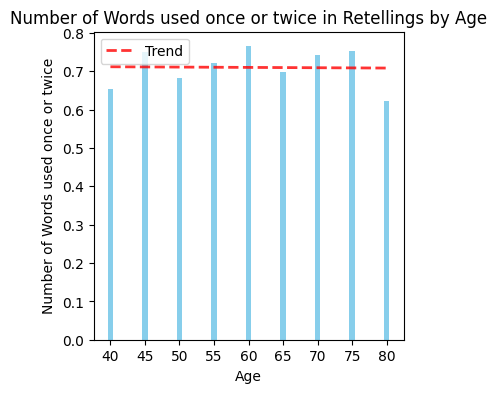

In [45]:
def word_used_once_or_twice(text):
    """Count the number of words used once or twice in the text."""
    tokens = word_tokenize(text)
    word_freq = nltk.FreqDist(tokens)
    return sum(1 for _, count in word_freq.items() if count <= 2)

words_used_once_or_twice_freq_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    once_or_twice_count = word_used_once_or_twice(text)
    words_used_once_or_twice_freq_by_age[age] = once_or_twice_count / len(text.split())
    
plot_dict(words_used_once_or_twice_freq_by_age, "Words used once or twice")

## Brunet index

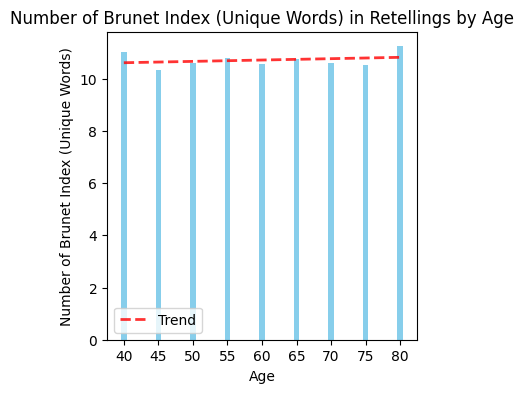

In [ ]:
def brunet_index(text, alpha=-0.165):
    """Calculate the Brunet index for the text = unique words."""
    # alpha is between -0.165 and -0.172
    tokens = word_tokenize(text)
    word_freq = nltk.FreqDist(tokens)
    unique_words = len(word_freq)
    tokens_count = len(tokens)
    return tokens_count ** unique_words ** alpha

brunet_index_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    brunet_idx = brunet_index(text)
    brunet_index_by_age[age] = brunet_idx
    
plot_dict(brunet_index_by_age, "Brunet Index (Unique Words)")

## Type Token Ratio

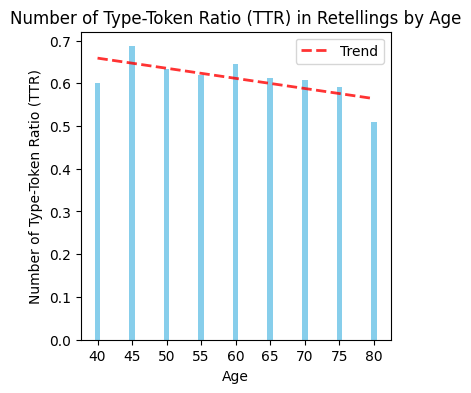

In [51]:
def token_type_ratio(text):
    """Calculate the type-token ratio for the text."""
    tokens = word_tokenize(text)
    word_freq = nltk.FreqDist(tokens)
    unique_words = len(word_freq)
    tokens_count = len(tokens)
    return unique_words / tokens_count

token_type_ratio_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    ttr = token_type_ratio(text)
    token_type_ratio_by_age[age] = ttr
plot_dict(token_type_ratio_by_age, "Type-Token Ratio (TTR)")

## Adposition frequency

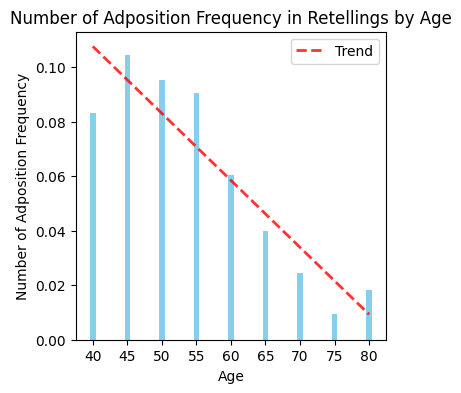

In [54]:
def adposition_frequency(text):
    """Calculate the frequency of adpositions in the text."""
    tokens = word_tokenize(text)
    words_and_tags = nltk.pos_tag(tokens)
    adpositions_count = sum(1 for _, tag in words_and_tags if tag == "IN")  # 'IN' is the tag for adpositions in NLTK
    return adpositions_count / len(tokens)

adposition_freq_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    adp_freq = adposition_frequency(text)
    adposition_freq_by_age[age] = adp_freq
    
plot_dict(adposition_freq_by_age, "Adposition Frequency")

## UNI AND BI-gram repetitions

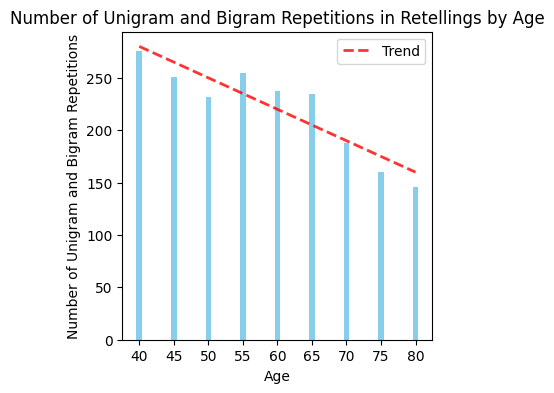

In [55]:
def uni_and_bi_grams_repetitions(text):
    """Calculate the frequency of unigrams and bigrams in the text."""
    tokens = word_tokenize(text)
    unigrams = nltk.FreqDist(tokens)
    bigrams = nltk.FreqDist(nltk.bigrams(tokens))
    return len(unigrams) + len(bigrams)

unigram_bigram_repetitions_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    repetitions = uni_and_bi_grams_repetitions(text)
    unigram_bigram_repetitions_by_age[age] = repetitions

plot_dict(unigram_bigram_repetitions_by_age, "Unigram and Bigram Repetitions")

## word frequency

In [74]:
def load_csv(file_path):
    """Load a CSV file and return its content."""
    return pd.read_csv(file_path)

subtl_and_zipf_df = load_csv('subtl_and_zipf.csv')
# filter relevant columns
subtl_and_zipf_df = subtl_and_zipf_df[['Word','FREQcount', 'SUBTLWF', 'Zipf-value']]
subtl_and_zipf_df.head()

,Word,FREQcount,SUBTLWF,Zipf-value
0,a,1041179,20415.27,7.309360
1,aa,87,1.71,3.236317
2,aaa,25,0.49,2.706807
3,aah,2688,52.71,4.721425
4,aahed,1,0.02,1.592864


In [75]:
subtl_and_zipf_df.describe()

,FREQcount,SUBTLWF,Zipf-value
count,7.428600e+04,74286.000000,74286.000000
mean,6.692992e+02,13.124088,2.479172
std,1.727704e+04,338.765454,0.835829
min,1.000000e+00,0.020000,1.592864
25%,2.000000e+00,0.040000,1.768955
50%,9.000000e+00,0.180000,2.291834
75%,4.500000e+01,0.880000,2.954592
max,2.134713e+06,41857.120000,7.621174


### subtl

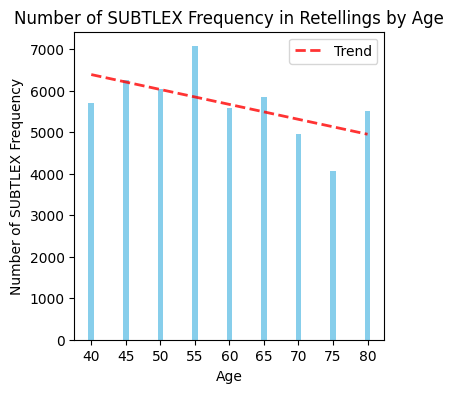

In [76]:
def word_freq_subtl(text, corpus_data):
    """Calculate the frequency of words in the text based on SUBTLEXus data."""
    tokens = word_tokenize(text)
    word_freq = nltk.FreqDist(tokens)
    total_freq = sum(word_freq.values())
    
    subtl_freq = 0
    for word, freq in word_freq.items():
        if word in corpus_data['Word'].values:
            subtl_freq += freq * corpus_data[corpus_data['Word'] == word]['SUBTLWF'].values[0]
    
    return subtl_freq / total_freq

subtl_freq_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    subtl_freq = word_freq_subtl(text, subtl_and_zipf_df)
    subtl_freq_by_age[age] = subtl_freq

plot_dict(subtl_freq_by_age, "SUBTLEX Frequency")

### zipf

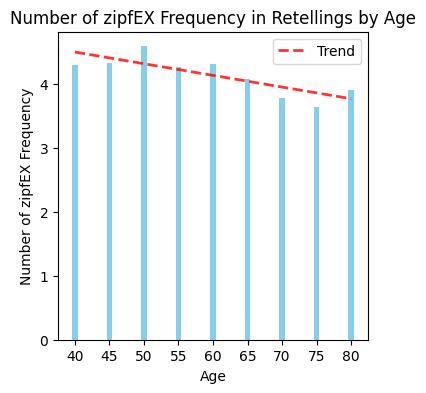

In [77]:
def word_freq_zipf(text, corpus_data):
    """Calculate the frequency of words in the text based on zipfEXus data."""
    tokens = word_tokenize(text)
    word_freq = nltk.FreqDist(tokens)
    total_freq = sum(word_freq.values())
    
    zipf_freq = 0
    for word, freq in word_freq.items():
        word_lower = word.lower()
        matching_rows = corpus_data[corpus_data['Word'] == word_lower]
        if not matching_rows.empty:
            zipf_value = matching_rows['Zipf-value'].values[0]
            zipf_freq += freq * zipf_value
    
    return zipf_freq / total_freq if total_freq > 0 else 0

zipf_freq_by_age = {}
for item in data.get('retellings', []):
    age, text = item['age'], item['story']
    zipf_freq = word_freq_zipf(text, subtl_and_zipf_df)
    zipf_freq_by_age[age] = zipf_freq

plot_dict(zipf_freq_by_age, "zipfEX Frequency")